In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

다음의 캐글 노트북을 필사했습니다.  
https://www.kaggle.com/code/sudalairajkumar/simple-exploration-baseline-ga-customer-revenue

# 대회 설명  
80/20 규칙은 많은 비즈니스 전용(businesses-only)에 있어서 사실로 드러났습니다. 적은 비율의 고객들이 대부분의 이익을 생산한다는 것입니다. 이로써 마케팅 팀들은 홍보 전략으로 적절한 투자를 하기를 도전받습니다.  
  
이러한 관점에서 당신은 구글 머천다이즈 스토어의 고객 데이터셋으로 고객당 이익을 예측하는 것을 분석하기를 도전받습니다. 바라건대 결과가 더욱 실행 가능하며 기능적으로 변경 가능하고 GA 데이터 위에서 데이터 분석을 사용하는 회사들의 마케팅 예산을 더욱 잘 쓸 수 있도록 되길 바랍니다.

## Important Note  
우리는 지금 새로운 진보적인 문제 공식을 수행하기 위해 데이터를 업데이트 했습니다. 당신은 테스트 셋에 첨부된 모든 유저에 대해서 target을 예측해야 한다는 것을 기억하세요.(`test_v2.csv`) 고객들의 거래에 있어 미래 시간 기간인 2018년 12월 1일부터 2019년 1월 31일까지

불행하게도 시간 제약 때문에, 이 데이터의 BigQuery 버전이 당장 만들어지지 않을 것입니다.

### What should I expect the data format to be?  
train_v2.csv와 test_v2.csv 둘 다 아래의 데이터 필드들에 등록된 컬럼들을 가지고 있습니다. 데이터셋에 있는 각각의 행은 스토어에 방문한 사람입니다. 왜냐하면 우리가 유저당 전체 이익의 log를 예측하기 때문에, `test_vs.csv`에 있는 모든 row들이 submission의 모든 행들과 대응하지는 않을 것이라는 것을 알아두세요. 하지만 `fullVisitorId`는 submission의 모든 row와 대응할 것입니다.  
  
IMPORTANT: `fullVisitorId`의 설정으로 인해 모든 id들이 적절히 unique하기 위해서는 id들을 string으로 로드해야 합니다.  
    
다양한 깊이의 JSON blobs들이 포함된 여러 컬럼들이 있습니다. 이러한 JSON 컬럼들의 하나는 `totals`인데 이는 `transactionRevenue`의 sub-column이며 이는 우리가 예측하려고 하는 이익의 정보를 담고 있습니다. 이 sub-column은 오직 training data를 위해 존재합니다.

## What am I predicting?  
우리는 모든 유저당 거래의 합의 자연로그를 예측합니다. 데이터가 갱신되면 위에 언급했듯이 이는 `test_v2.csv`의 2018년 12월 1일부터 2019년 1월 31일까지의 모든 유저들일 것입니다. test set에 있는 모든 유저들에 대해서 타겟은 다음과 같습니다.

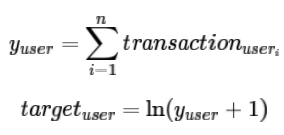

데이터셋은 2018년 12월 1일부터 2019년 1월 31일의 데이터를 포함하지 않는다는 것을 기억하세요. 당신은 제공된 test_v2.csv에 있는 고유한 `fullVisitorId`들을 밝혀내야 하며 이러한 관측되지 않은 달에 대해서 예측해야 합니다.

# File Descriptions  
* train_v2.csv - the updated training set - contains user transactions from August 1st 2016 to April 30th 2018. (2016년 8월 1일 - 2018년 4월 30일)  
* test_v2.csv - the updated test set - contains user transactions from May 1st 2018 to October 15th 2018. (2018년 5월 1일 - 2018년 11월 15일)  
* sample_submission_v2.csv - a updated sample sumission file in the correct format. Contains all `fullVisitorId`s in test_v2.csv. Your Submission's `PredictedLogRevenue` column should make forward-looking predictions for each of these `fullVisitorId`s for the timeframe of December 1st 2018 to January 31st 2019. Review "What am I predicting?" above for details.

## Data Fields  
fullVisitorId- A unique identifier for each user of the Google Merchandise Store.  
* channelGrouping - The channel via which the user came to the Store.  
* date - The date on which the user visited the Store.  
* device - The specifications for the device used to access the Store.  
* geoNetwork - This section contains information about the geography of the user.  
* socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".  
* totals - This section contains aggregate values across the session.  
* trafficSource - This section contains information about the Traffic Source from which the session originated.  
* visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.  
* visitNumber - The session number for this user. If this is the first session, then this is set to 1.  
* visitStartTime - The timestamp (expressed as POSIX time).  
* hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.  
* customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.  
* totals - This set of columns mostly includes high-level aggregate data.  

# Imports

In [2]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

필드의 일부가 json 형식으로 되어 있다는 것을 기억해야 합니다.  
  
다음의 커널 덕분에 파일에 있는 모든 json 필드를 다른 대회에서 일반적으로 사용하는 csv 형식으로 flttened할 수 있습니다.  
  
https://www.kaggle.com/code/julian3833/1-quick-start-read-csv-and-flatten-json-fields/notebook

In [3]:
# 메모리 문제로 nrows - 700000으로 수정해 주었음

def load_df(csv_path = '../input/ga-customer-revenue-prediction/train.csv', nrows=700000):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSouce']
    
    df = pd.read_csv(csv_path,
                     converters={column: json.loads for column in JSON_COLUMNS},
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")

    return df

In [4]:
# # 데이터 로드
# csv_path = '../input/ga-customer-revenue-prediction/train.csv'

# temp_train = pd.read_csv(csv_path)

In [5]:
# temp_train.head()

json 파일의 형식에 대한 글  
https://www.delftstack.com/ko/howto/python-pandas/load-json-file-pandas/

In [6]:
# JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSouce']

In [7]:
# temp_df = pd.read_csv(csv_path,
#                       converters={'device': json.loads},
#                       nrows=None)

In [8]:
# temp_df.head()

In [9]:
# column_as_df = json_normalize(temp_df['device'])
# column_as_df.head()

In [10]:
# del column_as_df
# del temp_df
# del JSON_COLUMNS
# del temp_train

# import gc
# gc.collect

## 실험
load_df 함수를 처음부터 돌리려고 하면 메모리 부족 문제가 일어남. 따라서 csv 파일을 하나씩 만들어서 저장하는 방향으로 진행해보기

In [11]:
%%time
train_df = load_df()
test_df = load_df("../input/ga-customer-revenue-prediction/test.csv")

In [12]:
train_df.head()